In [7]:
# Import Libraries
import time
import random
import string
import re
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.import time: digunakan untuk menyediakan fungsi terkait waktu, seperti time.sleep() untuk memberhentikan eksekusi program untuk sementara.

2.import random: digunakan untuk menghasilkan angka acak atau memilih secara acak dari kumpulan data.

3.import string:berisi konstanta-konstanta string seperti string.ascii_letters, string.digits, dll., yang berguna untuk manipulasi string.

4.import re: digunakan untuk  operasi-operasi ekspresi reguler untuk pencocokan pola string.

5.import numpy as np: NumPy adalah pustaka Python untuk komputasi numerik. Ini menyediakan objek array multidimensi, fungsi-fungsi matematika yang canggih, aljabar linier, transformasi Fourier, dan lainnya.

6.import pandas as pd: Pandas adalah pustaka Python yang menyediakan struktur data dan alat analisis data. Salah satu struktur data utamanya adalah DataFrame, yang berguna untuk menganalisis data tabular.

7.import tensorflow as tf: TensorFlow adalah platform sumber terbuka untuk komputasi numerik yang sangat efisien dan mudah digunakan. Ini menyediakan kerangka kerja untuk membangun dan melatih model machine learning dan deep learning.

8.import matplotlib.pyplot as plt: Matplotlib adalah pustaka untuk membuat visualisasi dalam Python, seperti plot, grafik, histogram, dan lainnya.

9.from tensorflow.keras.models import Model: Dari TensorFlow, kita mengimpor kelas Model, yang digunakan untuk membangun model neural network.

10.from keras.utils import plot_model: Dari Keras, kita mengimpor fungsi plot_model untuk menggambar representasi grafis dari struktur model neural network.

11.from sklearn.preprocessing import LabelEncoder: Dari scikit-learn, kita mengimpor LabelEncoder, yang digunakan untuk mengkodekan label kelas menjadi bilangan bulat.

12.from tensorflow.keras.preprocessing.text import Tokenizer: Dari TensorFlow, kita mengimpor Tokenizer, yang digunakan untuk memproses teks menjadi urutan token.

13.from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Flatten: Dari TensorFlow, kita mengimpor berbagai jenis lapisan neural network seperti Input, Embedding, LSTM, Dense, Dropout, dan Flatten.

14.from tensorflow.keras.preprocessing.sequence import pad_sequences: Dari TensorFlow, kita mengimpor fungsi pad_sequences, yang digunakan untuk membuat urutan teks memiliki panjang yang seragam dengan padding atau pemotongan.

In [9]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/chatbot/indonesian_conversation_data.csv", low_memory = False, encoding='utf8')
df.head()
#print(df.dtypes)

,Pertanyaan,Jawaban,Kategori
0,Apa yang menyebabkan depresi?,Depresi dapat disebabkan oleh kombinasi faktor...,Apa Depresi
1,Apa gejala umum dari depresi?,"Gejala umum depresi meliputi perasaan sedih, k...",Apa Depresi
2,Bagaimana cara mengatasi depresi?,Cara mengatasi depresi dapat meliputi terapi p...,Bagaimana Depresi
3,Apakah depresi bisa disembuhkan?,Depresi dapat disembuhkan dengan pengobatan ya...,Apakah Depresi
4,Apakah ada faktor risiko untuk mengalami depresi?,Ada beberapa faktor risiko yang dapat meningka...,Apakah Depresi


# Bagian Baru

* Code diatas digunakan untuk membaca file indonesian_conversation_data.csv dan ditampilkan 5 teratas dari data.

In [10]:
# digunakan untuk menampilkan kolom pertanyaan dan jawaban saja dengan mengambil variable df
data = df[['Pertanyaan', 'Kategori']]
data.head()

,Pertanyaan,Kategori
0,Apa yang menyebabkan depresi?,Apa Depresi
1,Apa gejala umum dari depresi?,Apa Depresi
2,Bagaimana cara mengatasi depresi?,Bagaimana Depresi
3,Apakah depresi bisa disembuhkan?,Apakah Depresi
4,Apakah ada faktor risiko untuk mengalami depresi?,Apakah Depresi


In [11]:
# Removing Punctuations (Menghilangkan Punktuasi)
data.loc[:, 'Pertanyaan'] = data['Pertanyaan'].apply(lambda wrd: ''.join([ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation]))
data.loc[:, 'Pertanyaan'] = data['Pertanyaan'].apply(lambda wrd: re.sub(r'\n', ' ', wrd))
data.loc[:, 'Pertanyaan'] = data['Pertanyaan'].apply(lambda wrd: re.sub(r'\(', '', wrd))
data.loc[:, 'Pertanyaan'] = data['Pertanyaan'].apply(lambda wrd: re.sub(r'\)', '', wrd))
data.loc[:, 'Pertanyaan'] = data['Pertanyaan'].apply(lambda wrd: re.sub(r',', '', wrd))
data.loc[:, 'Pertanyaan'] = data['Pertanyaan'].apply(lambda wrd: re.sub(r'-', '', wrd))
data.loc[:, 'Pertanyaan'] = data['Pertanyaan'].apply(lambda wrd: re.sub(r'/', '', wrd))
data.loc[:, 'Pertanyaan'] = data['Pertanyaan'].apply(lambda wrd: re.sub(r'/', '', wrd))
data.loc[:, 'Pertanyaan'] = data['Pertanyaan'].apply(lambda wrd: re.sub(r"[^\w]", ' ', wrd))

* dalam kode diatas berfungsi untuk membersikan kolom pertanyaan dalam dataframe dari tanda baca dan karakter khusus.
* seperti mengubah setiap karakter dalam kata menjadi huruf kecil dan menghilangkan tanda baca dengan string.punctuation
* apply() untuk menerapkan fungsi re.sub() dari modul re (regex) pada setiap nilai dalam kolom 'Pertanyaan'. Ini mengganti setiap karakter(kurung buka,kurung tutup,koma,tanda hubung,garis miring) (\n) dengan spasi.

In [12]:
kata_index = {}
for pattern in data['Pertanyaan']:
      kata = pattern.lower().split()
      for w in kata:
            if w not in kata_index:
                  kata_index[w] = len(kata_index) + 1

* dalam code diatas berfungsi untuk pengindeksan pada teks pertanyaan dari dataframe data atau biasa disebut tokenisasi

In [13]:
#kata_index
folder_path = '/content/drive/MyDrive/Colab Notebooks/chatbot/'
with open(folder_path + 'kata_index.pkl', 'wb') as f:
    pickle.dump(kata_index, f)

In [14]:
sequences = []
for sentence in data['Pertanyaan']:
    words = sentence.lower().split()  # Mengubah ke huruf kecil dan memecah kalimat menjadi kata-kata
    #print(words)
    sequence = [kata_index[word] for word in words]  # Mengubah setiap kata menjadi angka berdasarkan kamus
    sequences.append(sequence)

* dalam code diatas brfungsi untuk memberikan penomoran dalam setiap kata kolom pertanyaan

In [15]:
sequences

[[1, 2, 3, 4],
 [1, 5, 6, 7, 4],
 [8, 9, 10, 4],
 [11, 4, 12, 13],
 [11, 14, 15, 16, 17, 18, 4],
 [8, 9, 19, 20, 2, 21, 4],
 [1, 2, 22, 23, 24, 20, 25, 4],
 [11, 4, 12, 26, 27, 28],
 [11, 4, 12, 29, 30, 31, 20],
 [8, 9, 32, 33, 34, 35, 18, 4],
 [1, 28, 36, 4, 2, 6],
 [11, 4, 37, 38, 39, 40, 2, 41],
 [42, 4, 43, 44, 45, 2, 46],
 [11, 47, 48, 49, 10, 4],
 [11, 4, 48, 3, 50, 51],
 [11, 52, 12, 49, 53, 5, 4],
 [11, 4, 29, 30, 51],
 [11, 14, 54, 2, 55, 17, 56, 4],
 [8, 9, 57, 20, 2, 18, 4],
 [11, 4, 58, 38, 59],
 [1, 2, 22, 60, 23, 61, 62, 20, 38, 4],
 [11, 63, 64, 65, 4, 66, 67, 68, 69],
 [8, 9, 70, 11, 20, 71, 72, 73, 74, 18, 4],
 [11, 75, 48, 76, 77, 4],
 [11, 47, 78, 55, 79, 56, 4],
 [11, 50, 51, 48, 76, 5, 4],
 [8, 9, 80, 20, 2, 81, 18, 4],
 [11, 82, 12, 21, 4],
 [11, 4, 48, 29, 83, 20],
 [8, 9, 84, 85, 86, 17, 10, 4],
 [11, 63, 87, 2, 48, 49, 53, 5, 4],
 [8, 9, 88, 89, 90, 61, 18, 4],
 [11, 4, 48, 3, 50, 91],
 [8, 9, 57, 33, 34, 61, 92, 4],
 [11, 4, 58, 38, 93, 94, 91],
 [8, 9, 88, 95

In [16]:
# Menentukan panjang maksimum urutan angka
max_length = max(len(sequence) for sequence in sequences)

# Melakukan padding pada setiap urutan angka
padded_sequences = []
for sequence in sequences:
    padded_sequence = sequence + [0] * (max_length - len(sequence))
    padded_sequences.append(padded_sequence)

# Menyimpan hasil padded dalam variabel
padded_sequences_variable = padded_sequences

# Menampilkan urutan angka yang telah dipad
for padded_sequence in padded_sequences_variable:
    print(padded_sequence)

[1, 2, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 5, 6, 7, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[8, 9, 10, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[11, 4, 12, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[11, 14, 15, 16, 17, 18, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[8, 9, 19, 20, 2, 21, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 2, 22, 23, 24, 20, 25, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[11, 4, 12, 26, 27, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[11, 4, 12, 29, 30, 31, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[8, 9, 32, 33, 34, 35, 18, 4, 0, 0, 0, 0, 0,

In [17]:
train = padded_sequences_variable

In [18]:
# digunakan untuk mengkorversi data train menjadi array numpy untuk memudahkan proses machine learning
x_train = np.array(train)
x_train

array([[   1,    2,    3, ...,    0,    0,    0],
       [   1,    5,    6, ...,    0,    0,    0],
       [   8,    9,   10, ...,    0,    0,    0],
       ...,
       [ 507,  215, 1093, ...,    0,    0,    0],
       [ 507,  115,  215, ...,    0,    0,    0],
       [ 507,  215, 1093, ...,    0,    0,    0]])

In [19]:
# code untuk menghitung panjang data input
panjang_input = x_train.shape[1]
print(panjang_input)

34


In [20]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/chatbot/'
with open(folder_path + 'panjang_input.pkl', 'wb') as f:
    pickle.dump(panjang_input, f)

In [21]:
# dalam code ini setiap kolom kategori maka diformat numerik untuk memudahkan pemrosesan selanjutnya
labels = data['Kategori']
label_mapping = {label: idx for idx, label in enumerate(labels.unique())}
y_train1 = labels.map(label_mapping)
y_train = y_train1.to_numpy()
y_train

array([  0,   0,   1, ..., 214, 214, 214])

In [22]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/chatbot/'
with open(folder_path + 'label_mapping.pkl', 'wb') as f:
    pickle.dump(label_mapping, f)

In [23]:
#digunakan untuk memetakan indeks numerik dengan label kategori
label_mapping_inverse = {idx: label for label, idx in label_mapping.items()}

In [24]:
label_mapping_inverse

{0: 'Apa Depresi',
 1: 'Bagaimana Depresi',
 2: 'Apakah Depresi',
 3: 'Bisakah Depresi',
 4: 'Apakah Stres',
 5: 'Bagaimana Cemas',
 6: 'Apakah Kesehatan Mental',
 7: 'Bagaimana Sedih',
 8: 'Bagaimana Keseimbangan',
 9: 'Bagaimana Stres',
 10: 'Bagaimana Kepercayaan Diri',
 11: 'Apa Kepercayaan Diri',
 12: 'Apa Cemas',
 13: 'Bagaimana Putus Asa',
 14: 'Bagaimana Kesehatan Mental',
 15: 'Apa Overthinking',
 16: 'Bagaimana Overthinking',
 17: 'Apakah Overthinking',
 18: 'Apa Sedih',
 19: 'Apakah Sedih',
 20: 'Apakah Cemas',
 21: 'Mengapa Menangis',
 22: 'Apakah Menangis',
 23: 'Bagaimana Menangis',
 24: 'Apa Kecewa',
 25: 'Bagaimana Kecewa',
 26: 'Apakah Kecewa',
 27: 'Apa Insecure',
 28: 'Bagaimana Insecure',
 29: 'Apakah Insecure',
 30: 'Apa Toxic',
 31: 'Bagaimana Toxic',
 32: 'Apakah Toxic',
 33: 'Apa Inner Child',
 34: 'Bagaimana Inner Child',
 35: 'Apakah Inner Child',
 36: 'Apa Mood',
 37: 'Bagaimana Mood',
 38: 'Apakah Mood',
 39: 'Apa Frustasi',
 40: 'Bagaimana Frustasi',
 41: '

In [25]:
# define vocabulary (untuk mencari jumlah kata unik dalam data pertanyaan)
vocabulary = len(kata_index)
print("Jumlah vocabulary data pertanyaan : ", vocabulary)

# output length
tag = np.unique(data['Kategori'])
panjang_output = len(tag)
print("Jumlah kelas unik: ", panjang_output)
print("Kelas unik: ", tag[0:5])

Jumlah vocabulary data pertanyaan :  2165
Jumlah kelas unik:  215
Kelas unik:  ['Apa Anxiety' 'Apa Autisme' 'Apa Bersyukur' 'Apa Bipolar' 'Apa Cemas']


In [26]:
# digunakan untuk membagi dataset menjadi pelatihan dan pengujian
from sklearn.model_selection import train_test_split
xtr, xte, ytr, yte = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [27]:
# digunakan untuk membuat dan mengkompilasi menggunakan metode jaringan syaraf
from keras import regularizers
i = Input(shape=(panjang_input,))
embedding_i = Embedding(vocabulary+1, 15)(i)
lstm_i = LSTM(15, return_sequences=True)(embedding_i)  # Regularisasi L2 dengan lambda=0.01
flatten_i = Flatten()(lstm_i)
output_i = Dense(panjang_output, activation="softmax")(flatten_i)  # Regularisasi L2 dengan lambda=0.01


model = Model(inputs=i, outputs=output_i)
# Compiling the model (Kompilasi Model)
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [28]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 34)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 34, 15)              │          32,490 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 34, 15)              │           1,860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 510)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 215)                 │         109,865 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 144,215 (563.34 KB)

 Trainable params: 144,215 (563.34 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# kode ini berisi riwayat pelatihan dan disimpan pada train_model
train_model = model.fit(xtr, ytr, epochs=100, validation_data=(xte,yte))

Epoch 1/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0329 - loss: 5.0401 - val_accuracy: 0.1424 - val_loss: 4.2250
Epoch 2/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.1596 - loss: 3.8027 - val_accuracy: 0.2500 - val_loss: 3.1670
Epoch 3/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2972 - loss: 2.8633 - val_accuracy: 0.4093 - val_loss: 2.5892
Epoch 4/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4691 - loss: 2.2066 - val_accuracy: 0.4852 - val_loss: 2.2122
Epoch 5/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5655 - loss: 1.7531 - val_accuracy: 0.5527 - val_loss: 1.9409
Epoch 6/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6235 - loss: 1.4844 - val_accuracy: 0.5538 - val_loss: 1.8099
Epoch 7/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6622 - loss: 1.2758 - val_accuracy: 0.5928 - val_loss: 1.6667
Epoch 8/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7112 - loss: 1.0963 - val_a

In [30]:
loss, accuracy = model.evaluate(xte, yte)

# Menampilkan hasil evaluasi
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}%".format(accuracy * 100))

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7389 - loss: 1.9954
Loss: 2.21
Accuracy: 70.78%


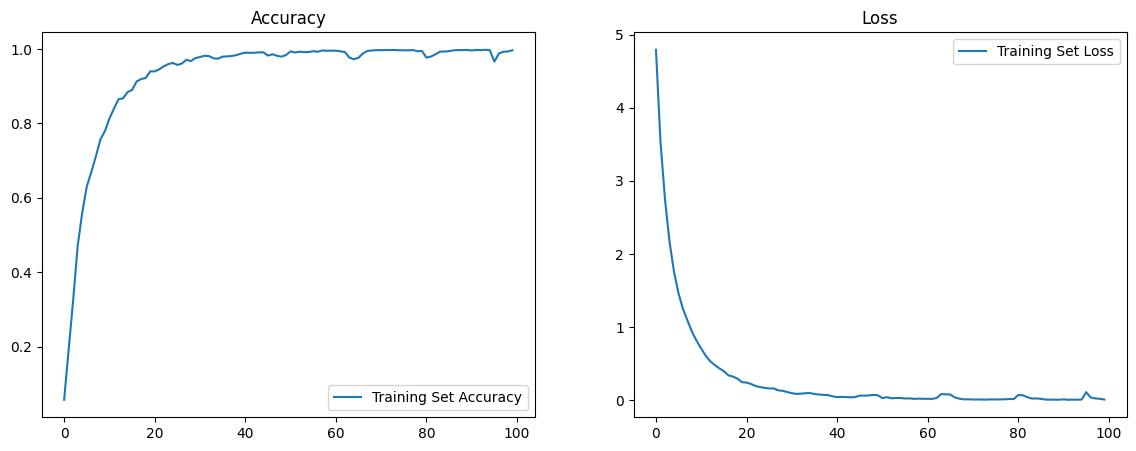

In [31]:
# Plotting model Accuracy and Loss (Visualisasi Plot Hasil Akurasi dan Loss)
# Plot Akurasi
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train_model.history['accuracy'],label='Training Set Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(train_model.history['loss'],label='Training Set Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [32]:
#digunakan untuk menyimpan  model kedalm format teks model.h5
import h5py
#model.save('model.h5')
model.save('/content/drive/MyDrive/Colab Notebooks/chatbot/model.h5')




In [33]:
jawaban = {}

for index, row in df.iterrows():
    kategori = row['Kategori']
    jawaban_1 = row['Jawaban']

    if kategori not in jawaban:
        jawaban[kategori] = [jawaban_1]
    else:
        jawaban[kategori].append(jawaban_1)

* jawaban = {}: Inisialisasi kamus kosong yang akan digunakan untuk menyimpan daftar jawaban untuk setiap kategori.

* for index, row in df.iterrows():: Melalui loop ini, setiap baris dalam DataFrame df diproses satu per satu.

* kategori = row['Kategori']: Mengambil nilai kategori dari kolom 'Kategori' untuk setiap baris.

* jawaban_1 = row['Jawaban']: Mengambil nilai jawaban dari kolom 'Jawaban' untuk setiap baris.

* if kategori not in jawaban:: Mengecek apakah kategori sudah ada dalam kamus jawaban.

* Jika kategori belum ada dalam kamus jawaban, maka membuat entri baru dengan kategori tersebut sebagai kunci dan daftar yang berisi jawaban tersebut sebagai nilai.

* Jika kategori sudah ada dalam kamus jawaban, maka menambahkan jawaban tersebut ke dalam daftar jawaban yang sudah ada untuk kategori tersebut.

In [34]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/chatbot/model.h5')

In [35]:
# Mengambil input dari pengguna
prediction_input = input('👨‍🦰 Kamu : ')

# Menghapus punktuasi dan konversi ke huruf kecil
prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
prediction_input = ''.join(prediction_input)

# Tokenisasi input
words = prediction_input.split()
sequence = [kata_index.get(word, 0) for word in words]  # Mengubah kata menjadi indeks berdasarkan kamus
padded_sequence = sequence + [0] * (panjang_input - len(sequence))  # Padding dengan menambahkan nilai 0

# Membuat prediksi
prediction = model.predict(np.array([padded_sequence]))
predicted_class = np.argmax(prediction)

# Mendapatkan tag kategori yang sesuai dengan prediksi
predicted_tag = list(label_mapping.keys())[list(label_mapping.values()).index(predicted_class)]

# Mendapatkan jawaban yang sesuai dengan tag kategori
predicted_answer = jawaban.get(predicted_tag)[0:20]

# Menampilkan hasil prediksi
if predicted_answer is not None:
    print("SMILE :) : ", random.choice(predicted_answer))
else:
    print("Jawaban tidak ditemukan.")

👨‍🦰 Kamu : apa depresi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
SMILE :) :  Saya SMILE, Asisten AI Terapeutik yang dirancang untuk membantu Anda. Ceritakan tentang dirimu.


* dalam code diatas pertama kita masukkan input pertanyaan kemudian diproses preprosesing ,kemudian dicocokkan antara kategori pertanyaan dengan jawaban yangsudah tersimpan dalam dataset setelah terdapat yang cocok maka akan ditampilkan ,namun disini hasil akhir dari chatbot masih memiliki akurasi jawaban yang rendah dan terkadang masih terjadi kesalahan .

In [36]:
!pip install gradio

In [37]:
import gradio as gr
import numpy as np
import string
import random
import tensorflow as tf
import pandas as pd
import pickle  # Mengimpor library pickle untuk memuat file .pkl

# Tentukan jalur folder tempat Anda menyimpan model dan data
folder_path = '/content/drive/MyDrive/Colab Notebooks/chatbot/'

# Memuat dataset CSV
df = pd.read_csv(folder_path + 'indonesian_conversation_data.csv')

# Kamus untuk menyimpan jawaban berdasarkan kategori
jawaban = {}

# Menyusun jawaban berdasarkan kategori
for index, row in df.iterrows():
    kategori = row['Kategori']
    jawaban_1 = row['Jawaban']

    if kategori not in jawaban:
        jawaban[kategori] = [jawaban_1]
    else:
        jawaban[kategori].append(jawaban_1)

# Muat model
model = tf.keras.models.load_model(folder_path + 'model.h5')

# Memuat kata_index, label_mapping, dan panjang_input dari file .pkl
with open(folder_path + 'kata_index.pkl', 'rb') as f:
    kata_index = pickle.load(f)

with open(folder_path + 'label_mapping.pkl', 'rb') as f:
    label_mapping = pickle.load(f)

with open(folder_path + 'panjang_input.pkl', 'rb') as f:
    panjang_input = pickle.load(f)

# Fungsi untuk memproses input dan membuat prediksi
def predict_response(prediction_input):
    # Menghapus tanda baca dan mengubah ke huruf kecil
    prediction_input = ''.join([letters.lower() for letters in prediction_input if letters not in string.punctuation])

    # Tokenisasi input
    words = prediction_input.split()
    sequence = [kata_index.get(word, 0) for word in words]  # Mengubah kata menjadi indeks berdasarkan kamus
    padded_sequence = sequence + [0] * (panjang_input - len(sequence))  # Padding dengan menambahkan nilai 0

    # Membuat prediksi
    prediction = model.predict(np.array([padded_sequence]))
    predicted_class = np.argmax(prediction)

    # Mendapatkan tag kategori yang sesuai dengan prediksi
    predicted_tag = list(label_mapping.keys())[list(label_mapping.values()).index(predicted_class)]

    # Mendapatkan jawaban yang sesuai dengan tag kategori
    predicted_answer = jawaban.get(predicted_tag, [])

    # Menampilkan hasil prediksi
    if predicted_answer:
        return random.choice(predicted_answer)  # Pilih jawaban acak
    else:
        return "Jawaban tidak ditemukan."

# Membuat antarmuka Gradio
iface = gr.Interface(
    fn=predict_response,  # Fungsi yang dipanggil saat input diberikan
    inputs="text",  # Input berupa teks
    outputs="text",  # Output berupa teks
    title="Chatbot Depresi",
    description="Masukkan pertanyaan Anda tentang depresi dan dapatkan jawaban dari chatbot",
    live=True  # Menampilkan hasil prediksi secara langsung
)

# Menjalankan antarmuka
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d05556dd309881595e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
